INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
Episode 100	 Score 0.00 Average Score 0.00Time 2.12 s
Episode 200	 Score 0.10 Average Score 0.03Time 7.98 ss
Episode 300	 Score 0.09 Average Score 0.24Time 4.96 s s
Episode 318	Score 2.60 Average Score 0.50	Time 170.54 s
Environment solved in 318 episodes!	Average Score: 0.50		Time Elapsed 3829.98 s


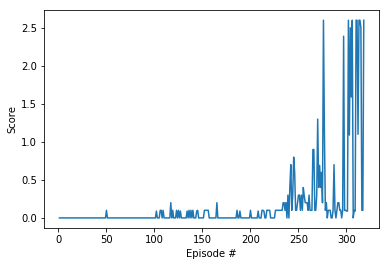

In [1]:
from agent import Agent
import random, torch, time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from model import Actor, Critic
from torch.autograd import Variable
from torchviz import make_dot
import torch
%matplotlib inline

env = UnityEnvironment(file_name="Tennis")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

def ddpg(n_episodes=1500, max_t=2000):
        
    scores_window = deque(maxlen=100)
    scores = []
    total_time_elapsed = 0
    for i_episode in range(1, n_episodes+1):
        begin = time.time()
        avg_score = 0
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores_t = np.zeros(num_agents)                        # initialize the score (for each agent)
        agent.reset()
        score = 0
        for t_step in range(max_t):
            actions = agent.act(states)     
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, t_step)
            states = next_states
            scores_t += rewards
            if np.any(dones):
                break
        
        score = np.max(scores_t)
        scores_window.append(np.max(score))
        avg_score = np.mean(scores_window)
        scores.append(score)        
        
        end = time.time()
        diff = end - begin
        print("\rEpisode {:}\tScore {:.2f} Average Score {:.2f}\tTime {:.2f} s".format(i_episode, score,avg_score, diff), end="")
        total_time_elapsed += diff
        
        if i_episode % 100 == 0:
            print("\rEpisode {:}\t Score {:.2f} Average Score {:.2f}".format(i_episode,score, avg_score))

        if avg_score >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\t\tTime Elapsed {:.2f} s'.format(i_episode, avg_score,total_time_elapsed))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')            
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [2]:
env.close()